In [ ]:
!pip install -q tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 60kB/s 
     |████████████████████████████████| 3.1MB 38.6MB/s 
     |████████████████████████████████| 501kB 47.8MB/s 


In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
tf.__version__

'2.12.0'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 78s 38ms/step - loss: 0.1514 - accuracy: 0.9528 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0296 - val_accuracy: 0.9917


In [11]:
y_true=test_labels
# y_pred=model.predict_classes(test_images)
# Realizar as previsões com o modelo
y_pred_prob = model.predict(test_images)

# Obter as classes previstas usando argmax
y_pred = np.argmax(y_pred_prob, axis=1)
print(y_pred)



313/313 [==============================] - 5s 16ms/step
[7 2 1 ... 4 5 6]


In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

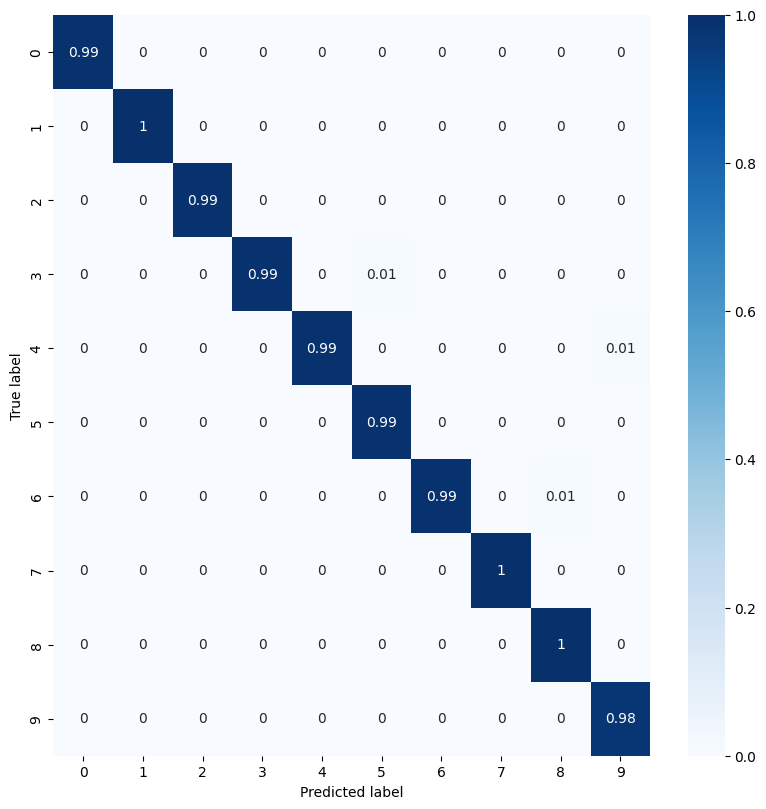

In [13]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
accuracy = np.trace(con_mat_norm) / np.sum(con_mat_norm)
sensitivity = con_mat_norm[1, 1] / (con_mat_norm[1, 1] + con_mat_norm[1, 0])
specificity = con_mat_norm[0, 0] / (con_mat_norm[0, 0] + con_mat_norm[0, 1])
precision = con_mat_norm[1, 1] / (con_mat_norm[1, 1] + con_mat_norm[0, 1])
f_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Acurácia: {accuracy}")
print(f"Sensibilidade: {sensitivity}")
print(f"Especificidade: {specificity}")
print(f"Precisão: {precision}")
print(f"F Score: {f_score}")


Acurácia: 0.9969849246231155
Sensibilidade: 1.0
Especificidade: 1.0
Precisão: 1.0
F Score: 1.0
